# Elektroautos


Du arbeitest als Data Scientist in einem Automobilkonzern deiner Wahl. Dein Chef hat die neuesten Daten über den Elektroautomarkt. Wie immer ist die Zeit knapp und um 14 Uhr hält dein Chef eine Presskonferenz über die neuen Zahlen. Da dein Chef selbst heute einen vollen Terminkalendar hat, bittet er dich die Daten auf- und für die Präsentation vorzubereiten. Dabei ist es wichtig, die Erkenntnisse für das Unternehmen in dem du arbeitest, auszuarbeiten.
(Wie steht euer Unternehmen im Vergleich zu den anderen Unternehmen am Markt da?)

Der Datensatz besteht aus zwei Teilen. Füge diese zunächst zusammen.

Erkunde den Datensatz. Hier kannst du beim Thema fehlende Werte weitere Vorgehensweisen ausprobieren, um die Daten zu befüllen. (hilfreiche Funktionen, um Häufigkeiten zu bestimmen: crosstab(),idxmax(), value_counts() ...)

Weiterhin bietet der Datensatz mindestens ein neues Features! Erstelle eins davon.

Werte den Datensatz aus! Welche Erkenntnisse kannst du daraus gewinnen?
                            
Vergiss nicht dein Vorgehen zu dokumentieren: Dokumentiere deine Schritte - bringe deine Gedanken auf Papier!


## Wofür stehen die Spalten?


- Brand ... Manufacturer of the vehicle
- Model ... Model name
- AccelSec ... Acceleration as 0-100 km/h
- TopSpeed_KmH ... The top speed in km/h
- Rang_Km ... Range in km
- Efficiency_WhKm ... Efficiency Wh/km --> wie viel kw brauch ich pro km bzw. Stromverbrauch pro km
- FastCharge_KmH ... Charge km/h --> Reichweite in km nach einer Stunde Schnellladen (ist ein theoretischer Wert)
- RapidCharge ... Yes / No --> besitzt Schnellladefunktion ja/nein
- PowerTrain ... Front (FWD), rear (RWD) , or all wheel drive (AWD)
- PlugType ... Plug type (Stecktyp zum Laden an der Ladesäule; abhängig vom Land in dem das Auto später fährt)
- BodyStyle ... Basic size or style (SUV, Schrägdach etc.)
- Seats ... Number of seats
- PriceEuro ... Price in Germany before tax incentives


https://www.kaggle.com/geoffnel/evs-one-electric-vehicle-dataset


## to DO

                                       1. Data Preprocessing
                                           1.1) Datensatz einlesen
                                           1.2) fehlende Werte
                                           1.3) Ausreißer
                                           1.4) Speicherplatz
                                           1.5) Pairplot - erste visuelle Inspektion
                                           1.6) Features
                                        
                                        2. Visualisierung

### Datensatz einlesen

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pd.read_csv("../data/ecar_part1.csv", sep='/n', engine='python')

,",Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector"
0,"0,Tesla ,Model 3 Long Range Dual Motor,4.6,233..."
1,"1,Volkswagen ,ID.3 Pure,10.0,160,270,167,101"
2,"2,Polestar ,2,4.7,210,400,181,102"
3,"3,BMW ,iX3 ,6.8,180,360,206,103"
4,"4,Honda ,e ,9.5,145,170,168,104"
...,...
98,"98,Nissan ,Ariya 63kWh,7.5,160,330,191,198"
99,"99,Audi ,e-tron S Sportback 55 quattro,4.5,210..."
100,"100,Nissan ,Ariya e-4ORCE 63kWh,5.9,200,325,19..."
101,"101,Nissan ,Ariya e-4ORCE 87kWh Performance,5...."


In [3]:
df_part1 = pd.read_csv("../data/ecar_part1.csv", sep=',', index_col=0)
df_part1

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,100
1,Volkswagen,ID.3 Pure,10.0,160,270,167,101
2,Polestar,2,4.7,210,400,181,102
3,BMW,iX3,6.8,180,360,206,103
4,Honda,e,9.5,145,170,168,104
...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,198
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,199
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,200
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,201


In [4]:
df_part2 = pd.read_csv("../data/ecar_part2.csv", sep='|', index_col=0)
df_part2

,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro,connector
0,940.0,Yes,AWD,Type 2 CCS,Sedan,5.0,55480,100
1,250.0,Yes,RWD,Type 2 CCS,Hatchback,?,30000,101
2,620.0,Yes,AWD,Type 2 CCS,Liftback,5.0,56440,102
3,560.0,Yes,RWD,Type 2 CCS,SUV,5.0,68040,103
4,190.0,Yes,RWD,Type 2 CCS,Hatchback,4.0,32997,104
...,...,...,...,...,...,...,...,...
98,440.0,Yes,FWD,Type 2 CCS,Hatchback,5.0,45000,198
99,540.0,Yes,AWD,Type 2 CCS,SUV,?,96050,199
100,440.0,Yes,AWD,missing_type,Hatchback,5.0,50000,200
101,450.0,Yes,AWD,Type 2 CCS,Hatchback,5.0,65000,201


In [5]:
# Dataframe Größe

print(df_part1.shape)
print(df_part2.shape)

(103, 7)
(103, 8)


In [6]:
# Merge two dataframes by index

# df = pd.merge(df_part1, df_part2, left_index=True, right_index=True) # Var 1 
# df = pd.concat([df_part1, df_part2], axis=1) # Var 2

df = df_part1.merge(df_part2, on="connector", how='outer')

df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,100,940.0,Yes,AWD,Type 2 CCS,Sedan,5.0,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,101,250.0,Yes,RWD,Type 2 CCS,Hatchback,?,30000
2,Polestar,2,4.7,210,400,181,102,620.0,Yes,AWD,Type 2 CCS,Liftback,5.0,56440
3,BMW,iX3,6.8,180,360,206,103,560.0,Yes,RWD,Type 2 CCS,SUV,5.0,68040
4,Honda,e,9.5,145,170,168,104,190.0,Yes,RWD,Type 2 CCS,Hatchback,4.0,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,198,440.0,Yes,FWD,Type 2 CCS,Hatchback,5.0,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,199,540.0,Yes,AWD,Type 2 CCS,SUV,?,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,200,440.0,Yes,AWD,missing_type,Hatchback,5.0,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,201,450.0,Yes,AWD,Type 2 CCS,Hatchback,5.0,65000


### Fehlende Werte

In [7]:
df.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
connector            int64
FastCharge_KmH     float64
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Seats               object
PriceEuro            int64
dtype: object

In [8]:
df.isnull().sum() # --> FastCharge_KmH hat 5 fellende Werte

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
connector          0
FastCharge_KmH     5
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Seats              0
PriceEuro          0
dtype: int64

In [9]:
df.loc[:,'Brand'].unique() # --> Leerzeichen am Ende

array(['Tesla ', 'Volkswagen ', 'Polestar ', 'BMW ', 'Honda ', 'Lucid ',
       'Peugeot ', 'Audi ', 'Mercedes ', 'Nissan ', 'Hyundai ',
       'Porsche ', 'MG ', 'Mini ', 'Opel ', 'Skoda ', 'Volvo ', 'Kia ',
       'Renault ', 'Mazda ', 'Lexus ', 'CUPRA ', 'SEAT ', 'Lightyear ',
       'Aiways ', 'DS ', 'Citroen ', 'Jaguar ', 'Ford ', 'Byton ',
       'Sono ', 'Smart ', 'Fiat '], dtype=object)

In [10]:
# Leerzeichen löschen
df.loc[:,'Brand'] = df.loc[:,'Brand'].apply(lambda x: x.strip())
df.loc[:,'Brand'].unique()

array(['Tesla', 'Volkswagen', 'Polestar', 'BMW', 'Honda', 'Lucid',
       'Peugeot', 'Audi', 'Mercedes', 'Nissan', 'Hyundai', 'Porsche',
       'MG', 'Mini', 'Opel', 'Skoda', 'Volvo', 'Kia', 'Renault', 'Mazda',
       'Lexus', 'CUPRA', 'SEAT', 'Lightyear', 'Aiways', 'DS', 'Citroen',
       'Jaguar', 'Ford', 'Byton', 'Sono', 'Smart', 'Fiat'], dtype=object)

In [11]:
df.loc[:,'Model'].unique() # --> Leerzeichen am Ende

array(['Model 3 Long Range Dual Motor', 'ID.3 Pure', '2', 'iX3 ', 'e ',
       'Air ', 'e-Golf ', 'e-208 ', 'Model 3 Standard Range Plus',
       'Q4 e-tron ', 'EQC 400 4MATIC', 'Leaf ', 'Kona Electric 64 kWh',
       'i4 ', 'IONIQ Electric', 'ID.3 Pro S', 'Taycan Turbo S', 'e-Up! ',
       'ZS EV', 'Cooper SE ', 'Corsa-e ', 'Model Y Long Range Dual Motor',
       'Enyaq iV 50', 'e-tron GT ', 'Model 3 Long Range Performance',
       'ID.4 ', 'ID.3 Pro', 'XC40 P8 AWD Recharge', 'i3 120 Ah',
       'e-2008 SUV ', 'e-tron 50 quattro', 'e-Niro 64 kWh',
       'Zoe ZE50 R110', 'Cybertruck Tri Motor', 'MX-30 ', 'Leaf e+',
       'UX 300e', 'el-Born ', 'Zoe ZE50 R135', 'EQA ',
       'Model S Long Range', 'Kona Electric 39 kWh',
       'e-tron Sportback 55 quattro', 'CITIGOe iV ', 'Mii Electric ',
       'e-Soul 64 kWh', 'Ampera-e ', 'Taycan 4S', 'One ', 'U5 ',
       'e-tron 55 quattro', 'Roadster ', 'Mokka-e ', 'Enyaq iV 80',
       'Model X Long Range', 'e Advance', '3 Crossback E-Tense',


In [12]:
# Leerzeichen löschen
df.loc[:,'Model'] = df.loc[:,'Model'].apply(lambda x: x.strip())

In [13]:
## Var 2 Leerzeichen zu löschen

# df.Brand = df.Brand.str.strip()
# df.Model = df.Model.str.strip()

In [14]:
# AccelSec -> float -> no null -> +
# TopSpeed_KmH -> int -> no null -> +
# Range_Km -> int -> no null -> +
# Efficiency_WhKm -> int -> no null -> +
# connector -> +
# FastCharge_KmH -> float -> 5 nulls 

In [15]:
df.loc[:,'RapidCharge'].unique() # --> +

array(['Yes', 'No'], dtype=object)

In [16]:
df.loc[:,'PowerTrain'].unique() # --> +

array(['AWD', 'RWD', 'FWD'], dtype=object)

In [17]:
df.loc[:,'PlugType'].unique() # --> 'missing_type' !!!

array(['Type 2 CCS', 'missing_type', 'Type 2 CHAdeMO', 'Type 2',
       'Type 1 CHAdeMO'], dtype=object)

In [18]:
df.loc[:,'PlugType'].value_counts()

Type 2 CCS        75
missing_type      15
Type 2             9
Type 2 CHAdeMO     3
Type 1 CHAdeMO     1
Name: PlugType, dtype: int64

In [19]:
df.loc[:,'BodyStyle'].unique()

array(['Sedan', 'Hatchback', 'Liftback', 'SUV', 'Pickup', 'MPV', 'Cabrio',
       'SPV', 'Station'], dtype=object)

In [20]:
# !!! Die Spalte soll numerischen Typ haben.
# Versuchen Daten in float Format zu konvertieren, um den Problemwert zu erkennen.

df.loc[:,'Seats'].astype(float) 

# --> ValueError: could not convert string to float: '?'

ValueError: could not convert string to float: '?'

In [21]:
# Ersetzen '?' durch np.nan
df.replace({"Seats":'?'}, np.nan, inplace=True )

df.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
connector            int64
FastCharge_KmH     float64
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Seats               object
PriceEuro            int64
dtype: object

In [22]:
df.isnull().sum() # --> Seats hat 18 fellende Werte

Brand               0
Model               0
AccelSec            0
TopSpeed_KmH        0
Range_Km            0
Efficiency_WhKm     0
connector           0
FastCharge_KmH      5
RapidCharge         0
PowerTrain          0
PlugType            0
BodyStyle           0
Seats              18
PriceEuro           0
dtype: int64

In [23]:
df.loc[:,'Seats'] = df.loc[:,'Seats'].astype(float)

In [24]:
df.loc[:,'Seats'].unique()

array([ 5., nan,  4.,  7.,  6.,  2.])

In [25]:
df.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
connector            int64
FastCharge_KmH     float64
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Seats              float64
PriceEuro            int64
dtype: object

In [26]:
# Prüfen die statistische Werte
df.describe()

# --> Keine extremgroße und extremkleine Werte. 
# --> Keine negative Werte. 
# --> mean und 50% Quantil sind ungefähr gleich

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,98.000000,85.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,151.000000,456.734694,4.894118,55811.563107
std,3.017430,43.573030,126.014444,29.566839,29.877528,201.262897,0.859451,34134.665280
min,2.100000,123.000000,95.000000,104.000000,100.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,125.500000,275.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,151.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,176.500000,560.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,202.000000,940.000000,7.000000,215000.000000


In [27]:
# df_nulls = df.loc[(df.loc[:,'FastCharge_KmH'].isnull()) | (df.loc[:,'Seats'].isnull()) | (df.loc[:,'PlugType'] == 'missing_type' )]

# print(df_nulls.shape)

# df_nulls.style.apply(lambda x: ['background-color: yellow']*14 if x.PlugType == 'missing_type' else ['background-color: default']*14, axis=1)


In [28]:
# df_nulls.style.highlight_null('yellow')

#### FastChrage_kmh

FastChrage_kmh:
Erkenntnis: FastCharge_kmh hängt von RapidCharge ab --> muss zusammen betrachet werden

Check: sind meine fehlende Wert in FastCharge_kmh auch diejenigen, die kein RapidCharge haben?

Idee 1: mit dem Mittelwert auffüllen --> Autos unterscheiden sich zu sehr voneinander; 
Verfälschung der Daten, da ich mit dem Mittelwert 
ausdrücke würde, dass ein Wert drin steht, obwohl die 
Charaktereigenschaften icht existiert

Idee 2: erstmal alles mit np.nan auffüllen --> um später damit arbeiten zu können
    
---**Idee 3: mit 0 auffüllen --> repräsentiert, dass ohne RapidCharge nicht weit kommen kann; 
wenn ein RapidCharge vorhanden ist, muss auch ein Wert größer 0 da stehen**---

Idee 4: mit -1 auffüllen --> damit erkennbar ist, dass es ein Ausreißer ist
    
Idee 5: Zeilen löschen --> würde ich die 5 Zeilen löschen, dann würden alle Autos die keine Schnellladefunktion
haben, aus meinem Datensatz gelöscht. Ich würde mir dann nur noch Autos mit
der Charaktereigenschaft Schnellladefunktion ansehen und auswerten!
--> Muss kommuniziert werden!

In [29]:
# Aufgabe: Wie kann ich sicherstellen, dass die 5 fehlenden Werte in FastCharge auch wirklich
# autos sind, die keine RapidCahrge funktion haben?


print("RapidCharge = No -> FastCharge_KmH is Null =", df.loc[df.loc[:, 'RapidCharge'] == 'No', "FastCharge_KmH"].isnull().sum())

print("RapidCharge = Yes -> FastCharge_KmH is Null =", df.loc[df.loc[:, 'RapidCharge'] == 'Yes', "FastCharge_KmH"].isnull().sum())


RapidCharge = No -> FastCharge_KmH is Null = 5
RapidCharge = Yes -> FastCharge_KmH is Null = 0


In [30]:
df.replace({'FastCharge_KmH': np.nan}, 0, inplace=True)       # loc[:, 'FastCharge_KmH'].

In [31]:
#df.loc[df.loc[:, "Seats"].isnull(), ["Brand", "BodyStyle"]]
#df.loc[(df.loc[:, "Brand"] == "Volkswagen") &  (df.loc[:, "BodyStyle"] == "Hatchback")]

#### Seats

fehlende werte befüllen:

1. Schritt: Seats hängt mit bodystyle zusammen
2. Schritt: welche bodystyle typen haben fehlende werte in den seats?
3. Schritt: wie ermittle ich die häufigkeit pro bodystyle type? 
4. Schritt: fehlende werte mit ermittelten werten befüllen


Schritt1: visuell ermitteln was der häufigste Wert ist ( groupby, crosstab)

Schritt 2: fehlenden Werte mit dem häufigsten wert zu befüllen 

alternativ: alles in einem Rutsch: value_counts() und idxmax()

In [32]:
pd.crosstab(index = df.loc[:,"BodyStyle"], columns=df.loc[:,"Seats"])

Seats,2.0,4.0,5.0,6.0,7.0
BodyStyle,,,,,
Cabrio,1,2,0,0,0
Hatchback,1,10,16,0,0
Liftback,0,0,5,0,0
MPV,0,0,1,0,0
Pickup,0,0,0,3,0
SPV,0,0,1,0,2
SUV,0,0,29,0,4
Sedan,0,5,4,0,0
Station,0,1,0,0,0


In [33]:
df.groupby(["BodyStyle", "Seats"]).size()

BodyStyle  Seats
Cabrio     2.0       1
           4.0       2
Hatchback  2.0       1
           4.0      10
           5.0      16
Liftback   5.0       5
MPV        5.0       1
Pickup     6.0       3
SPV        5.0       1
           7.0       2
SUV        5.0      29
           7.0       4
Sedan      4.0       5
           5.0       4
Station    4.0       1
dtype: int64

In [34]:
df.loc[df.loc[:, "Seats"].isnull(), "BodyStyle"].value_counts()

SUV          12
Hatchback     5
Sedan         1
Name: BodyStyle, dtype: int64

In [35]:
bodyStyle_ohne_seats_list = df.loc[df.loc[:, "Seats"].isnull(), "BodyStyle"].unique()
bodyStyle_ohne_seats_list

array(['Hatchback', 'Sedan', 'SUV'], dtype=object)

In [36]:
bodystyle_seats_df = df.groupby(["BodyStyle", "Seats"], as_index=False).size()
bodystyle_seats_df

,BodyStyle,Seats,size
0,Cabrio,2.0,1
1,Cabrio,4.0,2
2,Hatchback,2.0,1
3,Hatchback,4.0,10
4,Hatchback,5.0,16
5,Liftback,5.0,5
6,MPV,5.0,1
7,Pickup,6.0,3
8,SPV,5.0,1
9,SPV,7.0,2


In [37]:
bodystyle_seats_df.loc[bodystyle_seats_df.loc[:, "BodyStyle"] == "Hatchback"]

,BodyStyle,Seats,size
2,Hatchback,2.0,1
3,Hatchback,4.0,10
4,Hatchback,5.0,16


In [38]:
for bodystyle in bodyStyle_ohne_seats_list:
#     max_id = bodystyle_seats_df.loc[bodystyle_seats_df.loc[:, "BodyStyle"] == bodystyle, 'size'].idxmax()
#     print(f"max_id={max_id}")
    
#     val = bodystyle_seats_df.iloc[max_id, 1]

    val = df.loc[df.loc[:, "BodyStyle"] == bodystyle].groupby("Seats").size().idxmax()
    
    print(bodystyle, "val =",val)
    
    df.loc[(df.loc[:, "BodyStyle"] == bodystyle) & df.loc[:, "Seats"].isnull(), 'Seats'] = val

    
    print("---------------")
    

Hatchback val = 5.0
---------------
Sedan val = 4.0
---------------
SUV val = 5.0
---------------


In [39]:
df.Seats.unique()

array([5., 4., 7., 6., 2.])

In [40]:
df.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
connector            int64
FastCharge_KmH     float64
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Seats              float64
PriceEuro            int64
dtype: object

In [41]:
df.loc[:,'Seats'] = df.loc[:,'Seats'].astype(int)

In [42]:
df.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
connector            int64
FastCharge_KmH     float64
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Seats                int32
PriceEuro            int64
dtype: object

In [43]:
pd.crosstab(index = df.loc[:,"BodyStyle"], columns=df.loc[:,"Seats"], margins=True)

Seats,2,4,5,6,7,All
BodyStyle,,,,,,
Cabrio,1,2,0,0,0,3
Hatchback,1,10,21,0,0,32
Liftback,0,0,5,0,0,5
MPV,0,0,1,0,0,1
Pickup,0,0,0,3,0,3
SPV,0,0,1,0,2,3
SUV,0,0,41,0,4,45
Sedan,0,6,4,0,0,10
Station,0,1,0,0,0,1


### Pairplot - erste visuelle Darstellung

In [44]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'connector', 'FastCharge_KmH', 'RapidCharge',
       'PowerTrain', 'PlugType', 'BodyStyle', 'Seats', 'PriceEuro'],
      dtype='object')

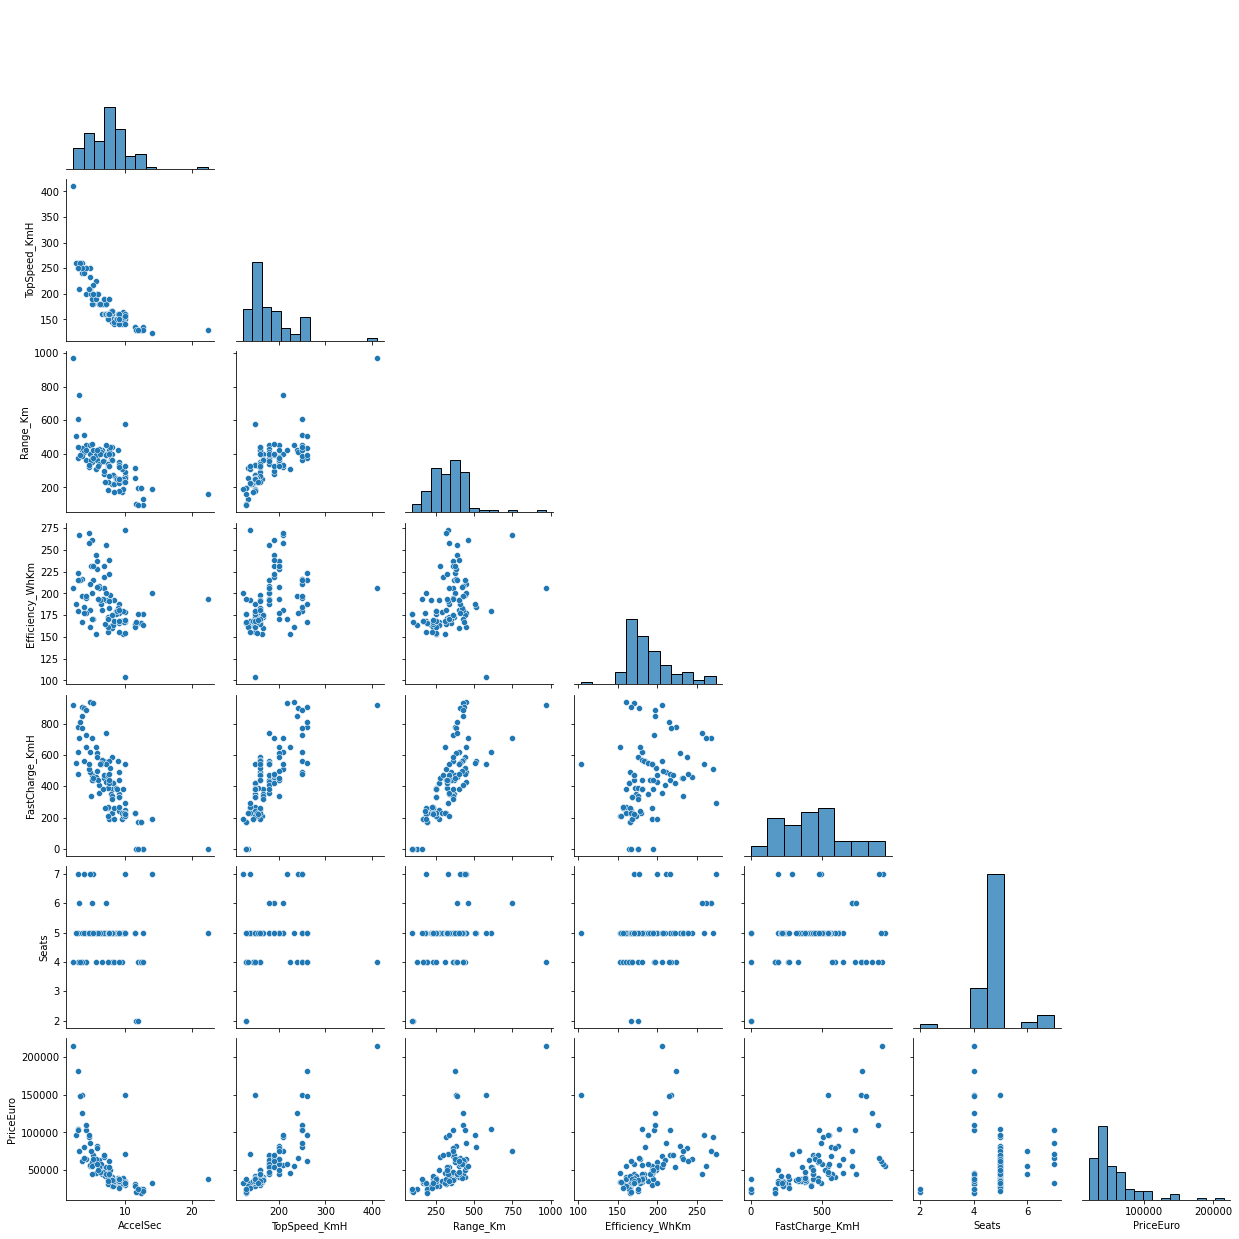

In [45]:
sns.pairplot(df, corner = True, vars = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'Seats', 'PriceEuro'])

### Neue Features

#### Max Ladedauer in min

In [46]:
df['Max_Ladedauer_in_min'] = round((df['Range_Km']/df['FastCharge_KmH'])*60,2)
df 

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro,Max_Ladedauer_in_min
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,100,940.0,Yes,AWD,Type 2 CCS,Sedan,5,55480,28.72
1,Volkswagen,ID.3 Pure,10.0,160,270,167,101,250.0,Yes,RWD,Type 2 CCS,Hatchback,5,30000,64.80
2,Polestar,2,4.7,210,400,181,102,620.0,Yes,AWD,Type 2 CCS,Liftback,5,56440,38.71
3,BMW,iX3,6.8,180,360,206,103,560.0,Yes,RWD,Type 2 CCS,SUV,5,68040,38.57
4,Honda,e,9.5,145,170,168,104,190.0,Yes,RWD,Type 2 CCS,Hatchback,4,32997,53.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,198,440.0,Yes,FWD,Type 2 CCS,Hatchback,5,45000,45.00
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,199,540.0,Yes,AWD,Type 2 CCS,SUV,5,96050,37.22
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,200,440.0,Yes,AWD,missing_type,Hatchback,5,50000,44.32
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,201,450.0,Yes,AWD,Type 2 CCS,Hatchback,5,65000,50.00


In [47]:
# Max_Ladedauer_in_min für Autos one RapidCharge

df.loc[df.loc[:, 'RapidCharge']  == 'No', 'Max_Ladedauer_in_min']

57    inf
68    inf
77    inf
82    inf
91    inf
Name: Max_Ladedauer_in_min, dtype: float64

In [48]:
df.replace({'Max_Ladedauer_in_min': np.inf}, 0, inplace=True)

In [49]:
df.loc[df.loc[:, 'RapidCharge']  == 'No', 'Max_Ladedauer_in_min']

57    0.0
68    0.0
77    0.0
82    0.0
91    0.0
Name: Max_Ladedauer_in_min, dtype: float64

#### Batterykapazität/Leistung des Autos/Tank des Elektroautos

In [50]:
# weiteres Feature: Batterykapazität/Leistung des Autos/Tank des elektroautos --> je größer die Battery desto weiter komme ich (range_km)

df['Capacity_kWh'] = ((df['Range_Km']) * (df['Efficiency_WhKm'] / 1000)) # --> Batteriekapazität in Kilowatt
df["ChargingPower_kWh"] = df['Efficiency_WhKm'] * df['FastCharge_KmH'] / 1000 # --> Batterieladegeschwindigkeit
df['C_Rate'] = df['FastCharge_KmH'] / df["Range_Km"]

In [51]:
df.loc[df.loc[:, 'Brand'] == 'Tesla'].describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector,FastCharge_KmH,Seats,PriceEuro,Max_Ladedauer_in_min,Capacity_kWh,ChargingPower_kWh,C_Rate
count,13.000000,13.000000,13.000000,13.000000,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,4.092308,244.461538,500.769231,201.384615,145.00000,730.000000,5.692308,80272.307692,42.943846,102.879231,145.264615,1.565638
std,1.389521,55.996451,173.203230,39.075863,26.78619,175.641681,1.109400,44432.092785,14.892149,46.709995,37.707493,0.532281
min,2.100000,180.000000,310.000000,153.000000,100.00000,480.000000,4.000000,45000.000000,27.330000,47.430000,99.450000,0.946667
25%,3.000000,217.000000,425.000000,171.000000,124.00000,560.000000,5.000000,55480.000000,28.680000,72.645000,103.400000,1.088889
50%,3.800000,241.000000,450.000000,188.000000,151.00000,710.000000,6.000000,65620.000000,38.870000,94.940000,151.970000,1.543478
75%,5.000000,250.000000,505.000000,216.000000,161.00000,910.000000,7.000000,85990.000000,55.100000,99.840000,185.310000,2.091954
max,7.000000,410.000000,970.000000,267.000000,186.00000,940.000000,7.000000,215000.000000,63.380000,200.250000,189.570000,2.195122


### Price Segment

In [52]:
df.PriceEuro.describe()

count       103.000000
mean      55811.563107
std       34134.665280
min       20129.000000
25%       34429.500000
50%       45000.000000
75%       65000.000000
max      215000.000000
Name: PriceEuro, dtype: float64

In [53]:
kategorien = ['budget','mass','premium']

max_pr = df.PriceEuro.max()

df["segment"] = pd.cut(df.loc[:, "PriceEuro"], bins = [0, 30000, 60000, max_pr] , labels = kategorien)

df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro,Max_Ladedauer_in_min,Capacity_kWh,ChargingPower_kWh,C_Rate,segment
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,100,940.0,Yes,AWD,Type 2 CCS,Sedan,5,55480,28.72,72.45,151.34,2.088889,mass
1,Volkswagen,ID.3 Pure,10.0,160,270,167,101,250.0,Yes,RWD,Type 2 CCS,Hatchback,5,30000,64.80,45.09,41.75,0.925926,budget
2,Polestar,2,4.7,210,400,181,102,620.0,Yes,AWD,Type 2 CCS,Liftback,5,56440,38.71,72.40,112.22,1.550000,mass
3,BMW,iX3,6.8,180,360,206,103,560.0,Yes,RWD,Type 2 CCS,SUV,5,68040,38.57,74.16,115.36,1.555556,premium
4,Honda,e,9.5,145,170,168,104,190.0,Yes,RWD,Type 2 CCS,Hatchback,4,32997,53.68,28.56,31.92,1.117647,mass


In [54]:
df["segment"]

0         mass
1       budget
2         mass
3      premium
4         mass
        ...   
98        mass
99     premium
100       mass
101    premium
102    premium
Name: segment, Length: 103, dtype: category
Categories (3, object): ['budget' < 'mass' < 'premium']

### Otimierung des Speicherplatzes

In [55]:
df.dtypes

Brand                     object
Model                     object
AccelSec                 float64
TopSpeed_KmH               int64
Range_Km                   int64
Efficiency_WhKm            int64
connector                  int64
FastCharge_KmH           float64
RapidCharge               object
PowerTrain                object
PlugType                  object
BodyStyle                 object
Seats                      int32
PriceEuro                  int64
Max_Ladedauer_in_min     float64
Capacity_kWh             float64
ChargingPower_kWh        float64
C_Rate                   float64
segment                 category
dtype: object

In [56]:
df.memory_usage(deep=True)

Index                    824
Brand                   6439
Model                   7254
AccelSec                 824
TopSpeed_KmH             824
Range_Km                 824
Efficiency_WhKm          824
connector                824
FastCharge_KmH           824
RapidCharge             6175
PowerTrain              6180
PlugType                6911
BodyStyle               6439
Seats                    412
PriceEuro                824
Max_Ladedauer_in_min     824
Capacity_kWh             824
ChargingPower_kWh        824
C_Rate                   824
segment                  399
dtype: int64

In [57]:
df_opti = df.copy()

In [58]:
df_opti.drop(columns = 'connector', inplace = True)

In [59]:
df_opti.loc[:, 'Brand'] = df_opti.loc[:, 'Brand'].astype("category")

In [60]:
df_opti.loc[:, 'Brand'].unique()

['Tesla', 'Volkswagen', 'Polestar', 'BMW', 'Honda', ..., 'Ford', 'Byton', 'Sono', 'Smart', 'Fiat']
Length: 33
Categories (33, object): ['Tesla', 'Volkswagen', 'Polestar', 'BMW', ..., 'Byton', 'Sono', 'Smart', 'Fiat']

In [61]:
df_opti.loc[:,[
    "AccelSec",
    "Max_Ladedauer_in_min",
    "Capacity_kWh",
    "ChargingPower_kWh",
    "C_Rate"]] = df_opti.loc[:,[
        "AccelSec",
        "Max_Ladedauer_in_min",
        "Capacity_kWh",
        "ChargingPower_kWh",
        "C_Rate"]].apply(pd.to_numeric, downcast="float")

In [62]:
df_opti.dtypes

Brand                   category
Model                     object
AccelSec                 float32
TopSpeed_KmH               int64
Range_Km                   int64
Efficiency_WhKm            int64
FastCharge_KmH           float64
RapidCharge               object
PowerTrain                object
PlugType                  object
BodyStyle                 object
Seats                      int32
PriceEuro                  int64
Max_Ladedauer_in_min     float32
Capacity_kWh             float32
ChargingPower_kWh        float32
C_Rate                   float32
segment                 category
dtype: object

In [63]:
df_opti.loc[:, 'FastCharge_KmH'] = df_opti.loc[:, 'FastCharge_KmH'].astype("int")

In [64]:
df_opti.loc[:,[
    "TopSpeed_KmH",
    "Range_Km",
    "Efficiency_WhKm",
    "FastCharge_KmH",
    "Seats",
    "PriceEuro"]] = df_opti.loc[:,[
        "TopSpeed_KmH",
        "Range_Km",
        "Efficiency_WhKm",
        "FastCharge_KmH",
        "Seats",
        "PriceEuro"]].apply(pd.to_numeric, downcast="integer")

In [65]:
df_opti.loc[:, [
    'RapidCharge',
    'PowerTrain',
    'PlugType',
    'BodyStyle']] = df_opti.loc[:, [
        'RapidCharge',
        'PowerTrain',
        'PlugType',
        'BodyStyle']].astype("category")

In [66]:
df_opti.dtypes

Brand                   category
Model                     object
AccelSec                 float32
TopSpeed_KmH               int16
Range_Km                   int16
Efficiency_WhKm            int16
FastCharge_KmH             int16
RapidCharge             category
PowerTrain              category
PlugType                category
BodyStyle               category
Seats                       int8
PriceEuro                  int32
Max_Ladedauer_in_min     float32
Capacity_kWh             float32
ChargingPower_kWh        float32
C_Rate                   float32
segment                 category
dtype: object

In [67]:
df_opti.memory_usage(deep=True)

Index                    824
Brand                   3232
Model                   7254
AccelSec                 412
TopSpeed_KmH             206
Range_Km                 206
Efficiency_WhKm          206
FastCharge_KmH           206
RapidCharge              330
PowerTrain               391
PlugType                 616
BodyStyle                966
Seats                    103
PriceEuro                412
Max_Ladedauer_in_min     412
Capacity_kWh             412
ChargingPower_kWh        412
C_Rate                   412
segment                  399
dtype: int64

In [68]:
# df_opti['Test'] =  df_opti['Range_Km'].astype(int) * df_opti['Efficiency_WhKm'].astype(int)

In [69]:
# df_opti['Test_2'] = df['Range_Km'] * df['Efficiency_WhKm']

In [70]:
# df_opti['Test'].describe()

In [71]:
# df_opti['Test_2'].describe()

In [72]:
# df_opti.dtypes

### Speicherung des DataFrames für die Visualisierung

In [73]:
df_opti.to_pickle('ecar_after_preprocessing.pkl')